In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,classification_report,silhouette_score,accuracy_score

file_path = 'LAbTest - LAbTest.csv'

# loading the data
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [53]:
# Exploratory analysis

# Display basic information about the dataset
data.info()

# Display statistical summary of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [54]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values with the mean for numerical columns and mode for categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

Series([], dtype: int64)


In [55]:
# convert categorical values to numberical using onehotencoding using pandas getdummies
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [56]:
# Preprocess the dataset using MinMaxScalar Normalization
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit_transform(data)
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True


In [57]:
# split the dataset into train and split data 
# The dataset consists of 18 attributes. The Revenue attribute can be used as the class label.
# Administrative, Administrative Duration, Informational, Informational Duration, Product
# Related and Product Related Duration represent the number of different types of pages visited
# by the visitor in that session and total time spent in each of these page categories.
from sklearn.model_selection import train_test_split
X = data[['Administrative','Informational','ProductRelated','ProductRelated_Duration']]
Y = data['Revenue']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [58]:
# Perform Classification using KNN classifier for atleast 4 diffrent values of K

k_values = [2,3,4,5]

for i in k_values:
    modelknn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    modelknn.fit(x_train,y_train)
    
# Predictions for KNN
y_train_pred_knn = modelknn.predict(x_train)
y_test_pred_knn = modelknn.predict(x_test)

 

In [59]:
# Perform Classification using NAiveBayes classifier using all possible parameters

# Build Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)

# Predictions for Naive Bayes
y_train_pred_nb = nb.predict(x_train)
y_test_pred_nb = nb.predict(x_test)

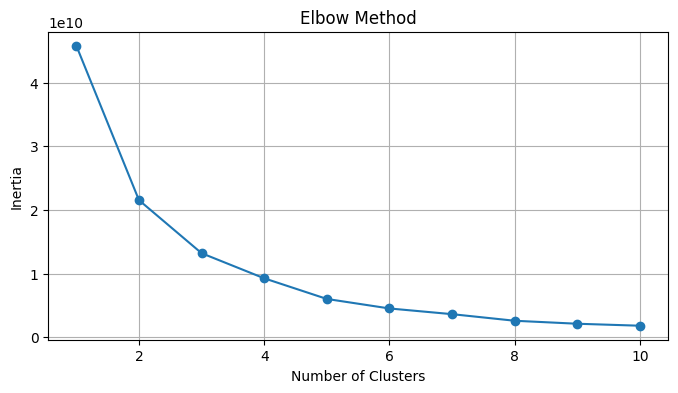

In [60]:
# Cluster the visitors into 8 clusters ,visalize it and compute the silhoutte score score VAlidate the number of clusters using elbow method
inertias = []
# Performing Elbow Method to find the Best number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# plotting the possible k values
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

labels = kmeans.labels_

data['Cluster'] = labels



By interpreting the Elbow graph we could understand that the eblow is formed at 2 but it would cause many errors at that datapoint hence we are choosing 3 as the value for the numbers

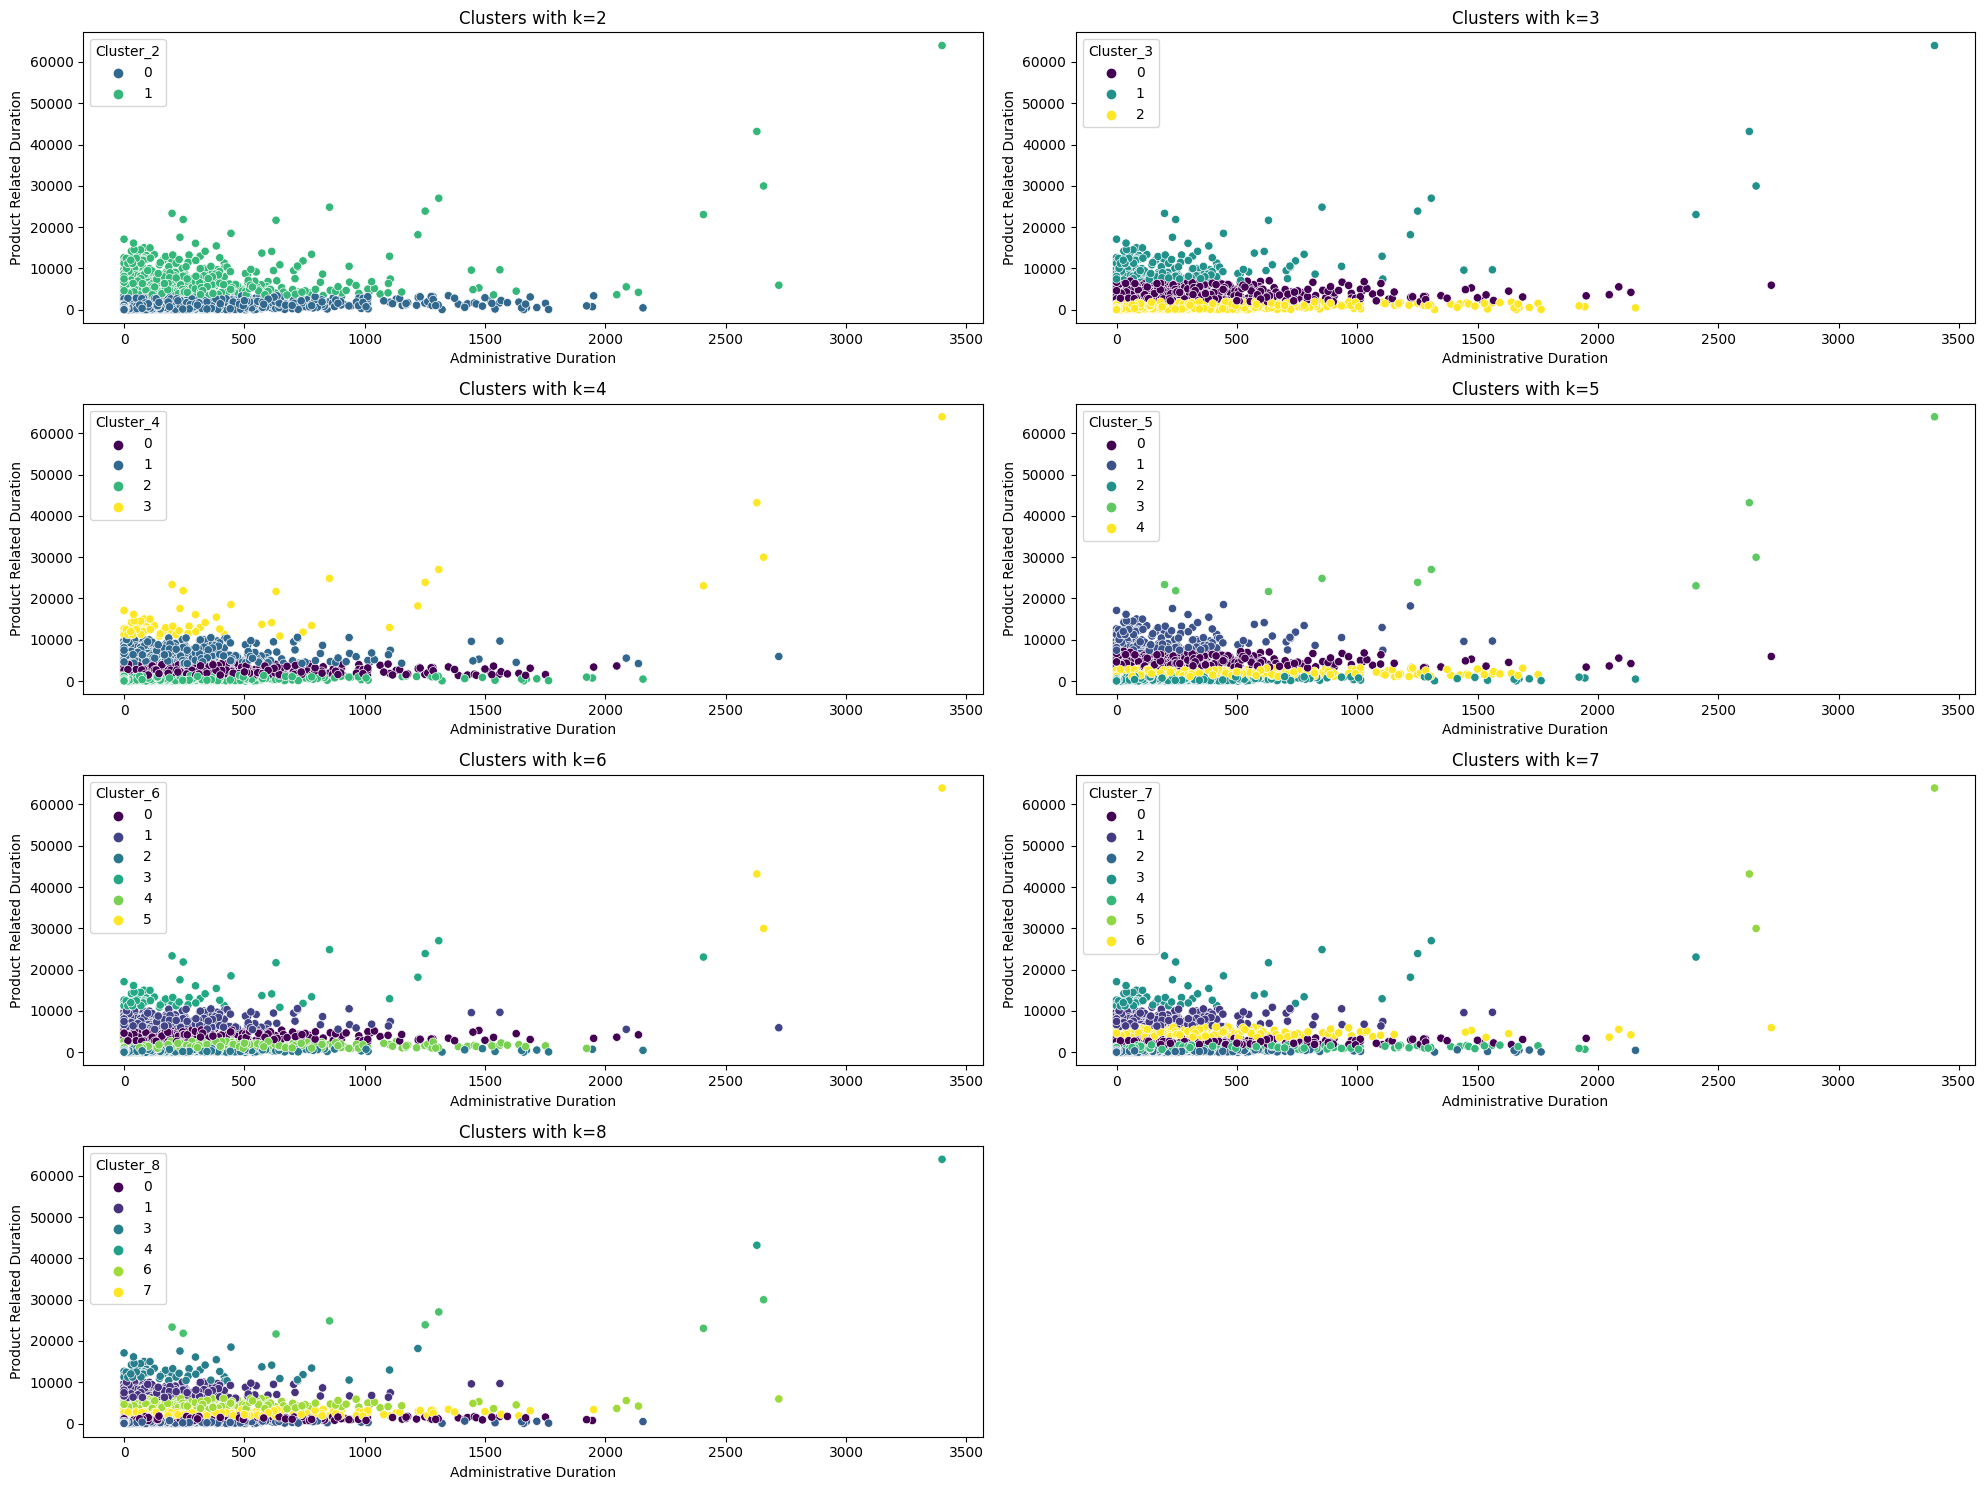

In [61]:
# providing all possible k values
kcluster_values = [2, 3, 4, 5, 6, 7, 8]
plt.figure(figsize=(20, 15))

# plotting the clusters for the  7 values of k
for idx, k in enumerate(kcluster_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    data[f'Cluster_{k}'] = labels

    plt.subplot(4, 2, idx + 1)
    sns.scatterplot(data=data, x='Administrative_Duration', y='ProductRelated_Duration', hue=f'Cluster_{k}', palette='viridis')
    plt.title(f'Clusters with k={k}')
    plt.xlabel('Administrative Duration')
    plt.ylabel('Product Related Duration')

plt.tight_layout()
plt.show()

In [62]:
# According to the question we are taking into account for validating wheather 8 clusters are suitable for this clustering or not
# We are taking into account for the following metrics
#  Silhouette score
# Calculating silhouettes score for K= 3 clustering 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)
cluster_3_score = silhouette_score(X,data['Cluster_3'])
print("Silhouettes Score for K = 3",cluster_3_score)

# calculating silhouettes score for K= 8 clustering 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)
cluster_3_score = silhouette_score(X,data['Cluster_8'])
print("Silhouettes Score for K = 8",cluster_3_score)


Silhouettes Score for K = 3 0.7108026008602492
Silhouettes Score for K = 8 0.6132905480245872


In [63]:
# Display Classification report and confusion matrix for both classifiers
# Evaluate KNN classifier
print('\nKNN Classifier:')
print(f'Accuracy on training set: {accuracy_score(y_train, y_train_pred_knn)}')
print(f'Accuracy on testing set: {accuracy_score(y_test, y_test_pred_knn)}')
print('Classification Report (Testing set):')
print(classification_report(y_test, y_test_pred_knn))
print('Confusion Matrix (Testing set):')
print(confusion_matrix(y_test, y_test_pred_knn))

print("\n--------------------------------------------------------------------------")

# Evaluate Naive Bayes classifier
print('\nNaive Bayes Classifier:')
print(f'Accuracy on training set: {accuracy_score(y_train, y_train_pred_nb)}')
print(f'Accuracy on testing set: {accuracy_score(y_test, y_test_pred_nb)}')
print('Classification Report (Testing set):')
print(classification_report(y_test, y_test_pred_nb))
print('Confusion Matrix (Testing set):')
print(confusion_matrix(y_test, y_test_pred_nb))


KNN Classifier:
Accuracy on training set: 0.8559842428455567
Accuracy on testing set: 0.8153555014868884
Classification Report (Testing set):
              precision    recall  f1-score   support

       False       0.85      0.96      0.90      3124
        True       0.19      0.06      0.09       575

    accuracy                           0.82      3699
   macro avg       0.52      0.51      0.49      3699
weighted avg       0.74      0.82      0.77      3699

Confusion Matrix (Testing set):
[[2984  140]
 [ 543   32]]

--------------------------------------------------------------------------

Naive Bayes Classifier:
Accuracy on training set: 0.8098713938129997
Accuracy on testing set: 0.8172479048391457
Classification Report (Testing set):
              precision    recall  f1-score   support

       False       0.86      0.93      0.90      3124
        True       0.34      0.19      0.24       575

    accuracy                           0.82      3699
   macro avg       0.60   

In [64]:
# Provide suitable inferences for the models created

# Inferences 
### Clssification inference 
For Naive bayes
Accuracy on training set: 0.8098713938129997
Accuracy on testing set: 0.8172479048391457

For KNN
Accuracy on training set: 0.8559842428455567
Accuracy on testing set: 0.8153555014868884

Naive bayes has better accuracy for testing data which is the unknown data than KNN

Naive Bayes classifier has higher precision and recall for the "True" class compared to the KNN classifier. This indicates that Naive Bayes is slightly better at correctly identifying true positives among the "True" class, though still with low recall, meaning it misses many actual positive cases.

If identifying the "True" class is crucial then  we can use Naive bayes

### Clustering Inference 
We could see that the k = 3 has a sillhouttes score value more  than k = 8 
hence k =3 is a more accurate value for the number of clusters 
